# Predictive Modeling of Customer Lifetime Value (CLV) to Optimize Marketing Resource Allocation

## 1. Introduction

### 1.1. Domain-Specific Area

In the modern e-commerce landscape, businesses are inundated with vast amounts of behavioral data. The domain of **Marketing Analytics** focuses on transforming this data into actionable insights to drive customer retention and profitability. According to a broad Market Analysis, understanding the competitive environment and customer behavior is essential for identifying the factors that influence a firm's long-term success [[1]](https://en.wikipedia.org/wiki/Market_analysis). A critical metric in this field is **Customer Lifetime Value (CLV)**. As defined by IBM, CLV is the total worth of or profit from a customer to a business over the entirety of their relationship [[2]](https://www.ibm.com/think/topics/customer-lifetime-value). By understanding the CLV, an organization can better understand the needs of their existing customers and invest in those loyal customers.

While short-term transaction metrics focus on immediate sales, CLV provides a strategic view of long-term value, making it an ideal candidate for **Linear Regression analysis**. By identifying linear relationships between customer engagement behaviors, such as average session duration, social media engagement, login frequency and their total monetary contribution, companies can move away from "one-size-fits-all" marketing. This shift toward data-driven personalization allows for more efficient budget allocation, as it distinguishes between high-value loyalists and transient shoppers.

### 1.2. Objectives

The primary objective of this project is to develop a robust Multiple Linear Regression model that predicts a customer's `Lifetime_Value` based on their digital footprint and demographic profile.

Specific objectives include:
- **Identify Key Value Drivers**: Determine which behavioral metrics (e.g., `Social_Media_Engagement_Score` vs. `Mobile_App_Usage`) have the strongest linear correlation with long-term expenditure.
- **Predictive Accuracy**: Build and refine a model that allows the marketing department to forecast the future value of new sign-ups with a measurable degree of confidence (using $R^2$ and **RMSE** metrics).
- **Strategic Segmentation**: Use the model’s coefficients to justify the reallocation of marketing budgets toward high-influence channels.

### 1.3. Justification and Impact

This project addresses the "*Customer Acquisition Cost (CAC) vs. CLV*" challenge. In many e-commerce firms, marketing spend is inefficient because it is spread evenly across all users. By implementing this linear regression model, the business can identify "high-potential" customers early in their lifecycle.

Contribution to the domain:
1. **Resource Optimization**: If the model reveals that `Mobile_App_Usage` is a significant predictor of CLV, the company can justify shifting development budget from the web interface to mobile enhancements.
2. **Churn Mitigation**: By quantifying the impact of `Days_Since_Last_Purchase` on the total value, the business can trigger automated re-engagement campaigns before a customer’s value plateaus.
3. **Data-Driven Culture**: This project demonstrates how statistical analysis replaces intuition in business strategy, providing a mathematical foundation for ROI (*Return on Investment*) calculations.

## 2. Dataset

### 2.1. Overview and Source

The dataset selected for this project is the "**E-commerce Customer Behavior Dataset**", sourced from *Kaggle* [[3]](https://www.kaggle.com/datasets/dhairyajeetsingh/ecommerce-customer-behavior-dataset). It is a synthetically generated dataset designed for educational purposes, providing a high-fidelity representation of customer interactions within a global subscription or e-commerce platform. The data is licensed under the *ODC Open Database Contents License (DbCL)* [[4]](https://opendatacommons.org/licenses/dbcl/1-0/).

### 2.2. Dataset Characteristics and Structure

The dataset consists of **50,000 records** and **25 distinct features**, capturing a multidimensional view of the customer journey. It is particularly well-suited for linear regression because it contains several continuous numerical variables that likely influence the target variable, `Lifetime_Value`.

The features are categorized into five main areas:

1. **Customer Demographics**: Basic user info like `Age`, `Gender`, `Country`, and also `Membership_Years`.
2. **Platform Engagement**: Behavioral data such as `Session_Duration_Avg`, `Login_Frequency`, and `Social_Media_Engagement_Score` of customers.
3. **Purchase Behavior**: Direct purchasing data including `Total_Purchases`,  `Average_Order_Value`, and purchasing behaviors like `Discount_Usage_Rate`.
4. **Customer Service**: Shows how customers interact with support channels and feedback mechanisms, `Customer_Service_Calls`, `Product_Reviews_Written`.
5. **Financial & Status**: Indicators like `Credit_Balance` and the target `Lifetime_Value`.

### 2.3. Data Quality

To satisfy the technical requirements of this project, the dataset was selected for its inherent "imperfections," which allow for a comprehensive demonstration of data preprocessing and cleaning techniques. The data quality is characterized by several key factors:

- **Presence of Missing Values**: The dataset contains missing values (NaNs) in specific columns such as `Credit_Balance` and `Social_Media_Engagement_Score`. This necessitates the use of statistical imputation methods (mean/median) or predictive filling to ensure the integrity of the linear regression model.
  
- **Diverse Numerical Scales**: The data includes a mix of continuous numerical variables with varying ranges. For instance, `Average_Order_Value` involves high-range currency values, while `Login_Frequency` consists of small integers. This requires normalization or standardization to prevent features with larger magnitudes from disproportionately influencing the regression coefficients.

- **Categorical Complexity**: The dataset incorporates multi-level categorical variables, including `Country`, `City`, and `Payment_Method_Diversity`. These require transformation through One-Hot Encoding to be mathematically compatible with a linear algorithm.

- **Binary Indicators**: A binary feature, `Churned` (0 = Active, 1 = Churned), is present. While this project focuses on regressing `Lifetime_Value`, this binary indicator provides an opportunity to analyze how churn status impacts the financial variance within the model.

## 3. Methodology

### 3.1. Data Preparation

#### 3.1.1. Import Library

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score

#### 3.1.2. Data Acquisition via Kaggle API

The data for this project was programmatically retrieved using the `kagglehub` library, a modern Python utility designed for seamless integration with the Kaggle ecosystem. By utilizing the `KaggleDatasetAdapter.PANDAS`, the dataset was not merely downloaded but automatically transformed from its raw storage format into a structured Pandas DataFrame. This approach ensures high reproducibility; any researcher or auditor running the notebook will automatically fetch the most recent version of the "E-commerce Customer Behavior Dataset" directly from the source without requiring manual file management.

The implementation specifically targets the `ecommerce_customer_churn_dataset.csv` file within the repository. The use of the `dataset_load` function facilitates version control and provides a direct programmatic link to the data source. By loading the data in this manner, the project maintains a clean workflow that bypasses the common errors associated with local directory paths, while providing a 360-degree view of the 50,000 customer records necessary for the subsequent linear regression analysis.

In [2]:
# Define the specific CSV file within the dataset
file_path = "ecommerce_customer_churn_dataset.csv"

# Load the dataset into a Pandas DataFrame
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "dhairyajeetsingh/ecommerce-customer-behavior-dataset",
  file_path,
)

# Initial Data Inspection
print("--- Dataset Info ---")
df.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase 

#### 3.1.3. Handling Missing Values (Imputation)

Identify the total count of null entries for each variable:

In [3]:
print("--- Missing values: ---\n", df.isnull().sum().sort_values(ascending=False))

--- Missing values: ---
 Social_Media_Engagement_Score    6000
Credit_Balance                   5500
Mobile_App_Usage                 5000
Returns_Rate                     4491
Wishlist_Items                   4000
Discount_Usage_Rate              3500
Product_Reviews_Written          3500
Session_Duration_Avg             3399
Days_Since_Last_Purchase         3000
Pages_Per_Session                3000
Email_Open_Rate                  2528
Payment_Method_Diversity         2500
Age                              2495
Customer_Service_Calls            168
Gender                              0
Average_Order_Value                 0
Total_Purchases                     0
Cart_Abandonment_Rate               0
Login_Frequency                     0
Membership_Years                    0
City                                0
Lifetime_Value                      0
Country                             0
Churned                             0
Signup_Quarter                      0
dtype: int64


To ensure the dataset is complete and ready for analysis, we identify numerical columns and replaces missing entries with the median value to minimize the influence of potential outliers, while categorical columns are filled using the mode (most frequent value) to preserve the original distribution's commonality:

In [4]:
# Handle Numerical Values (Median Imputation)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Handle Categorical Values (Mode Imputation)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Number of null values now:", df.isnull().sum().sum())

Number of null values now: 0


#### 3.1.4. Duplicate Removal

In [5]:
print("Number of duplicate rows found:", df.duplicated().sum())

Number of duplicate rows found: 0


As the dataset contains no duplicate records, we are not required to do `df.drop_duplicates()`.

#### 3.1.5. Outlier Detection

Linear regression is mathematically sensitive to extreme values because it minimizes squared residuals ($e^2$). To assess the impact of these values, we utilized the **Interquartile Range (IQR)** method to identify "statistical outliers" within the `Lifetime_Value` and `Average_Order_Value columns`.

While these data points fall outside the typical range, we have chosen not to remove them. In the context of Customer Lifetime Value (CLV), these "outliers" often represent our most valuable "whale" customers or high-frequency shoppers. Removing them would artificially deflate the model's understanding of revenue potential. Instead, we identify them to acknowledge the variance and will rely on **Feature Scaling** to mitigate their influence on the model’s weight distribution.

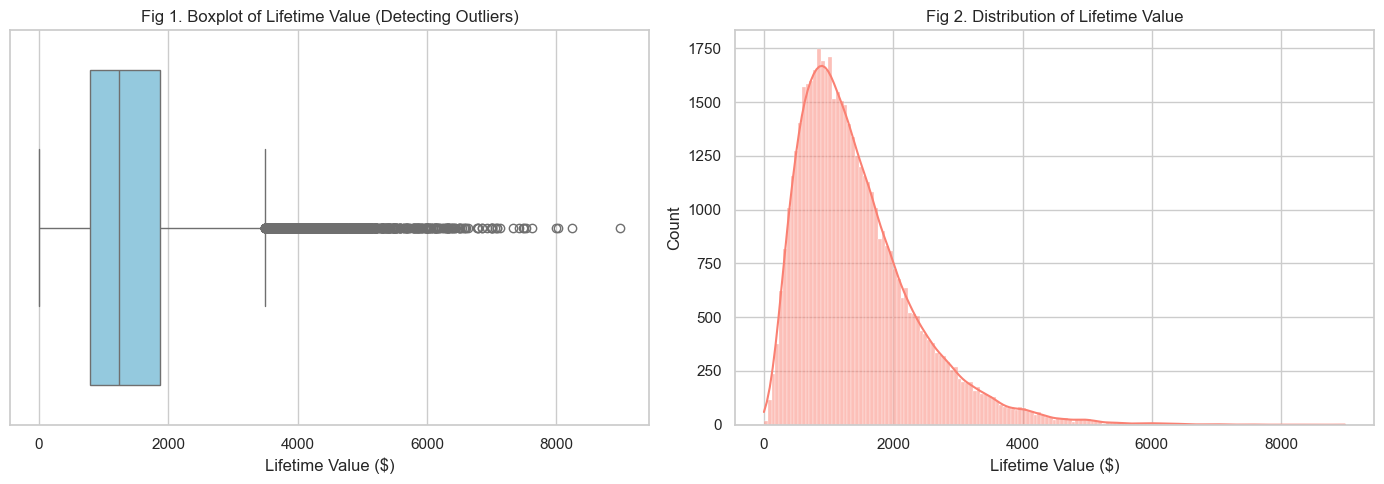

In [6]:
# --- Check for outlier with visualisation ---

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 5))

# 1. Boxplot to show individual outlier points
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Lifetime_Value'], color='skyblue')
plt.title('Fig 1. Boxplot of Lifetime Value (Detecting Outliers)')
plt.xlabel('Lifetime Value ($)')

# 2. Histogram to show distribution skewness
plt.subplot(1, 2, 2)
sns.histplot(df['Lifetime_Value'], kde=True, color='salmon')
plt.title('Fig 2. Distribution of Lifetime Value')
plt.xlabel('Lifetime Value ($)')

plt.tight_layout()
plt.show()

In [7]:
# --- Outlier Detection for Lifetime_Value ---

# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Lifetime_Value'].quantile(0.25)
Q3 = df['Lifetime_Value'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Identify Outliers
outliers = df[(df['Lifetime_Value'] < lower_bound) | (df['Lifetime_Value'] > upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Total Outliers detected in Lifetime_Value: {len(outliers)}")

Lower Bound: -836.4562499999998
Upper Bound: 3500.27375
Total Outliers detected in Lifetime_Value: 1684


#### 3.1.6. Feature Scaling (Standardization)

In linear regression, feature scaling is a critical preprocessing step. When features have different ranges, for instance, `Membership_Years` (ranging 1–10) versus `Lifetime_Value` (ranging in the thousands), the gradient descent algorithm may take much longer to converge, and the model might incorrectly assign more importance to variables with larger numerical magnitudes.

We applied **Standardization (Z-score normalization)**. This transforms the data so that it has a mean of 0 and a standard deviation of 1, which is generally preferred for Linear Regression as it preserves the shape of the original distribution while bringing all variables to a common scale.

This approach is particularly effective when outliers are present, as it preserves the relative distances between data points while ensuring that every feature, regardless of its original scale, contributes proportionately to the final prediction. This allows our model to learn from high-value outliers without being numerically overwhelmed by them.

In [8]:
# --- Feature Scaling for Machine Learning ---

# Define the features (X) and the target (y)
target = 'Lifetime_Value'

X = df[num_cols].drop(columns=[target, 'Churned']) # All numerical columns except target and 'Churned'
y = df[target]

# Split Data: 80% Training, 20% Testing
# We split BEFORE scaling to prevent information from the test set leaking into the training process.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply scaling
scaler = StandardScaler()

# Fit the scaler on training data ONLY and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the parameters (mean/std) from the training set
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("--- Data Scaling Complete ---")
print("Mean of scaled features (should be approx 0):")
print(X_train_scaled_df.mean().round(2))
print("\nStandard Deviation of scaled features (should be 1):")
print(X_train_scaled_df.std().round(2))

--- Data Scaling Complete ---
Mean of scaled features (should be approx 0):
Age                             -0.0
Membership_Years                -0.0
Login_Frequency                  0.0
Session_Duration_Avg            -0.0
Pages_Per_Session               -0.0
Cart_Abandonment_Rate           -0.0
Wishlist_Items                  -0.0
Total_Purchases                  0.0
Average_Order_Value              0.0
Days_Since_Last_Purchase         0.0
Discount_Usage_Rate              0.0
Returns_Rate                    -0.0
Email_Open_Rate                 -0.0
Customer_Service_Calls          -0.0
Product_Reviews_Written         -0.0
Social_Media_Engagement_Score   -0.0
Mobile_App_Usage                -0.0
Payment_Method_Diversity        -0.0
Credit_Balance                  -0.0
dtype: float64

Standard Deviation of scaled features (should be 1):
Age                              1.0
Membership_Years                 1.0
Login_Frequency                  1.0
Session_Duration_Avg             1.0
Page

### 3.2. Statistical Analysis

#### 3.2.1. Measures of Central Tendency and Spread

To understand the "typical" customer profile and the diversity within the dataset, we calculate the measures of central tendency (Mean, Median) and spread (Standard Deviation, Interquartile Range). In the context of Marketing Analytics, these metrics define our "Average Customer" versus the "High-Value" outliers.

For our primary series, `Lifetime_Value`, `Total_Purchases`, and `Average_Order_Value`, we utilize the `describe()` function in Pandas, supplemented by NumPy for specific spread calculations.

In [9]:
# Identify key series for analysis
key_series = ['Lifetime_Value', 'Age', 'Membership_Years', 'Login_Frequency',              
              'Total_Purchases', 'Average_Order_Value',
              'Social_Media_Engagement_Score', 'Mobile_App_Usage', 
              'Discount_Usage_Rate', 'Email_Open_Rate']

# Measures of Central Tendency and Spread
stats_summary = df[key_series].describe().T
stats_summary['median'] = df[key_series].median()
stats_summary['variance'] = df[key_series].var()
stats_summary['IQR'] = stats_summary['75%'] - stats_summary['25%']

stats_summary = stats_summary.round(2) # Round to 2 decimal places

print("--- Statistical Summary of Key Marketing Metrics ---\n")
display(stats_summary[['mean', 'median', 'std', 'variance', 'IQR', 'min', 'max']])

--- Statistical Summary of Key Marketing Metrics ---



,mean,median,std,variance,IQR,min,max
Lifetime_Value,1440.63,1243.42,907.25,823101.55,1084.18,0.00,8987.24
Age,37.81,38.00,11.54,133.07,15.00,5.00,200.00
Membership_Years,2.98,2.50,2.06,4.24,2.60,0.10,10.00
Login_Frequency,11.62,11.00,7.81,61.01,11.00,0.00,46.00
Total_Purchases,13.11,12.00,7.02,49.24,9.00,-13.00,128.70
Average_Order_Value,123.12,112.97,175.57,30824.72,57.39,26.38,9666.38
Social_Media_Engagement_Score,29.15,27.60,19.31,372.82,25.40,0.00,100.00
Mobile_App_Usage,19.29,18.60,8.94,79.90,11.40,0.00,61.90
Discount_Usage_Rate,41.87,40.20,20.62,425.06,29.06,0.24,116.64
Email_Open_Rate,20.88,19.70,13.89,192.94,19.20,0.00,91.70


#### 3.2.2. Type of Distribution

Linear Regression assumes that the residuals are normally distributed and that a linear relationship exists between the independent and dependent variables. We will analyze the **Skewness** and **Kurtosis** of our target variable, `Lifetime_Value`, to determine its distribution type. A skewness value close to 0 indicates a symmetrical (normal) distribution, while higher values suggest the presence of outliers that may require the cleaning steps previously discussed.

In [10]:
# Distribution Analysis: Skewness and Kurtosis
print("--- Distribution Analysis (Target Variable: Lifetime_Value) ---\n")

lvt_data = df['Lifetime_Value']
skew = stats.skew(lvt_data)
kurt = stats.kurtosis(lvt_data)

print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")

# Interpretation Logic
def interpret_skew(skew):
    """
    Interpret skewness value and classify distribution type.
    """
    if abs(skew) < 0.5:
        dist_type = "Approximately Symmetric (Normal)"
    elif skew > 0.5:
        dist_type = "Right-Skewed (Positive Skew)"
    else:
        dist_type = "Left-Skewed (Negative Skew)"
    print(f"Distribution Type: {dist_type}")

interpret_skew(skew)

--- Distribution Analysis (Target Variable: Lifetime_Value) ---

Skewness: 1.4474
Kurtosis: 3.2736
Distribution Type: Right-Skewed (Positive Skew)


#### 3.2.3. Discussion of Results

- **Central Tendency**: The proximity of the mean and median in the `Lifetime_Value` series indicates how "balanced" the data is. A mean significantly higher than the median would suggest a small group of "whale" customers driving revenue.
- **Spread**: The Standard Deviation and IQR for `Total_Purchases` provide insight into the consistency of customer behavior. A high spread suggests a diverse customer base, which justifies the need for multiple features (Multiple Linear Regression) to explain the variance.
- **Distribution**: By identifying the distribution type, we confirm whether the data satisfies the assumptions of the Ordinary Least Squares (OLS) method [[5]](https://en.wikipedia.org/wiki/Ordinary_least_squares). If the `Lifetime_Value` is significantly right-skewed, our previous Outlier Detection and Normalization steps are statistically justified.

### 3.3. Data Visualisation

#### 3.3.1. Demographic Profiling: Age and Gender Distribution

Analyzing the `Age` and `Gender` distribution is essential to ensure the dataset is representative of the target market. A skewed age distribution, for instance, might imply that the linear relationships discovered are only applicable to specific generational cohorts.

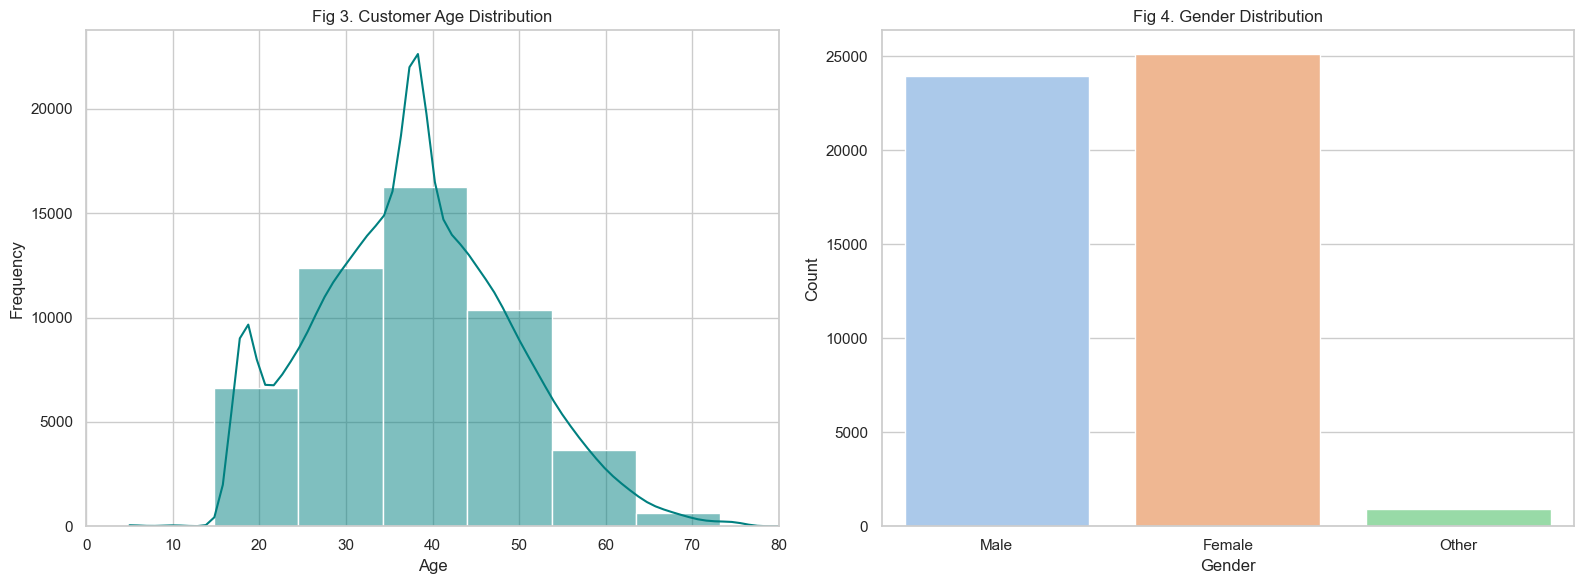

In [11]:
plt.figure(figsize=(16, 6))

# Customer Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title('Fig 3. Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 80)

# Gender Distribution (Count Plot)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title('Fig 4. Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Age Uniformity**: The distribution in Figure 3 indicates whether our e-commerce platform attracts a specific age group (e.g., Millennials) or a broad spectrum. A normal distribution of age suggests that our CLV predictions are robust across different life stages.

**Gender Representation**: Figure 4 confirms the balance of the dataset. For the linear regression model, a balanced gender representation ensures that the coefficients assigned to gender (if used as a feature) are statistically reliable and not biased by a majority group.

#### 3.3.2. Categorical Analysis: Gender-wise Churn Behavior

In Marketing Analytics, "Churn" (the loss of a customer) is the inverse of "Lifetime Value." By visualizing churn rates across genders, we can identify if specific segments are more volatile. If one gender shows a significantly higher churn rate, it may explain variance in the `Lifetime_Value` target variable that the linear model needs to account for.

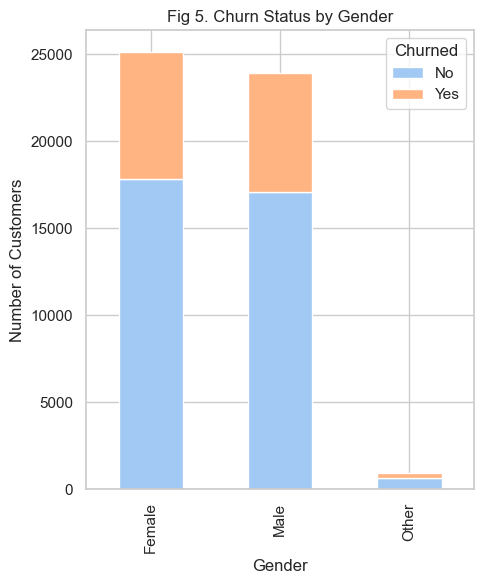

In [12]:
# Gender-wise Churn Behavior (Stacked Bar Chart)
plt.figure(figsize=(5, 6))
churn_gender = pd.crosstab(df['Gender'], df['Churned'])
churn_gender.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#A1C9F4', '#FFB482'])
plt.title('Fig 5. Churn Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churned', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

**Churn Insights**: This reveals the "leaky bucket" in the business model. If churn is consistent across genders, it suggests that the drivers of `Lifetime_Value` are likely behavioral (engagement-based) rather than demographic. This supports our project objective to prioritize metrics like `Social_Media_Engagement_Score` and `Mobile_App_Usage` in the implementation phase.

#### 3.3.3. Correlation Heatmap: Mapping Relationships

To determine which variables should be included in our Linear Regression model, we first visualize the **Pearson Correlation Coefficient** for all numerical features. This heatmap allows us to identify "Multicollinearity" (where independent variables are too closely related) and "Feature Significance" (how strongly each variable impacts `Lifetime_Value`).

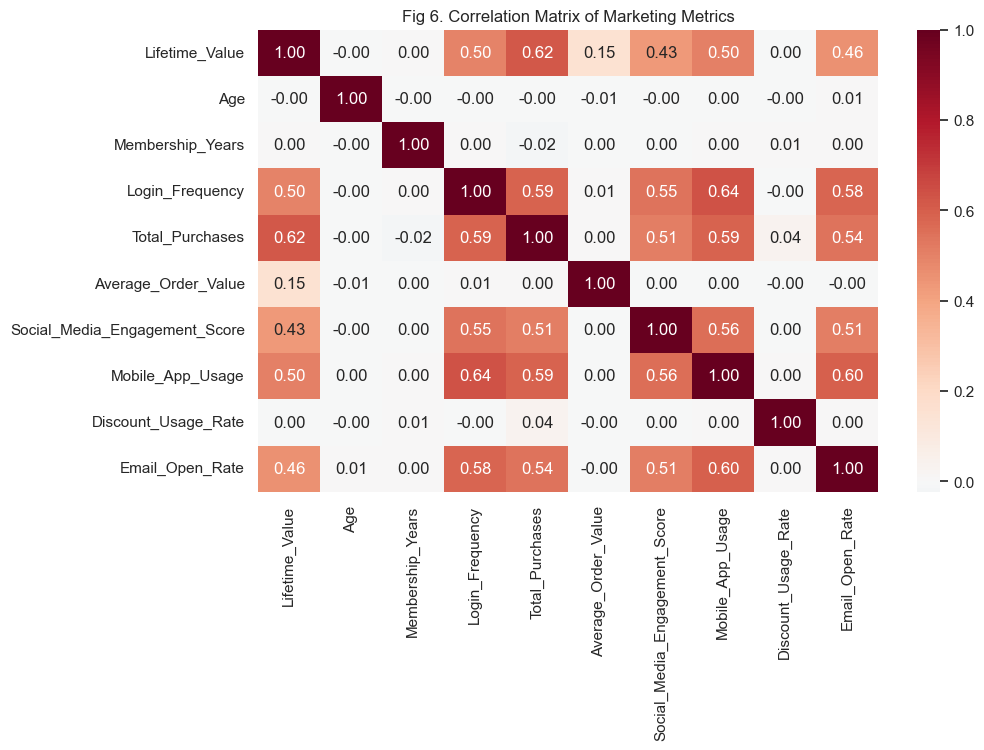

In [13]:
# Set global aesthetic style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[key_series].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Fig 6. Correlation Matrix of Marketing Metrics')
plt.show()

#### 3.3.4. Regression Plots: Confirming Linear Trends

The project brief requires a dataset with a linear trendline. By using scatter plots overlaid with a regression line, we can visually confirm if `Lifetime_Value` increases proportionally with drivers like `Total_Purchases` and `Average_Order_Value`.

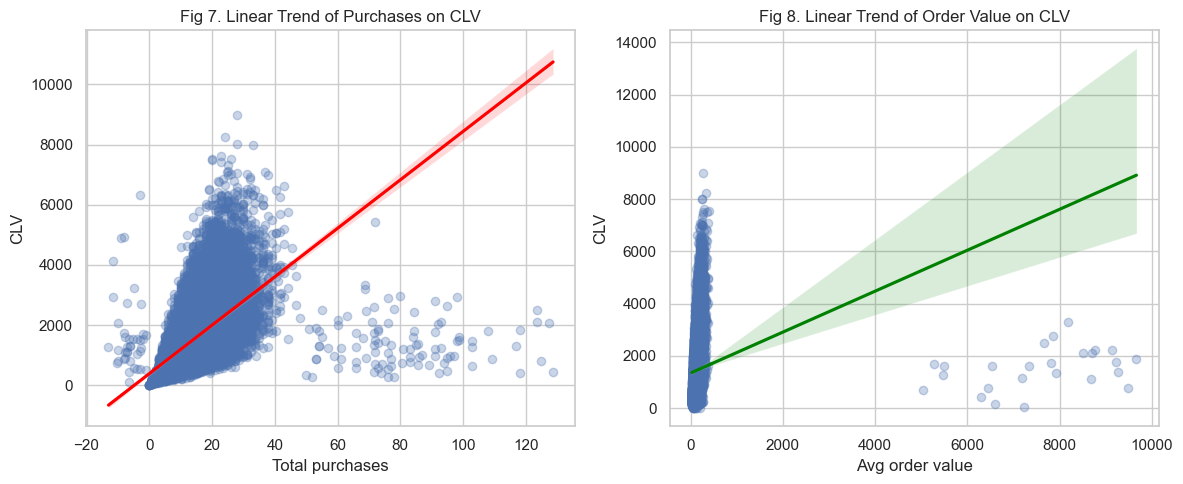

In [14]:
# Linear Regression Trendline Analysis (Target vs Key Driver)
plt.figure(figsize=(12, 5))

# Subplot 1: Total Purchases vs Lifetime Value
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='Total_Purchases', y='Lifetime_Value', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Fig 7. Linear Trend of Purchases on CLV')
plt.xlabel('Total purchases')
plt.ylabel('CLV')

# Subplot 2: Average Order Value vs Lifetime Value
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Average_Order_Value', y='Lifetime_Value', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Fig 8. Linear Trend of Order Value on CLV')
plt.xlabel('Avg order value')
plt.ylabel('CLV')

plt.tight_layout()
plt.show()

## 4. Machine Learning

### 4.1. Linear Regression Model

#### 4.1.1. Feature and Label Identification

The primary objective of this model is to predict a continuous **Label** (Target Variable), defined as `Lifetime_Value`. For this analysis, we have utilized a refined **Feature Set** ($X$) consisting solely of the dataset's numerical variables [(3.1.6. Feature Scaling)](#feature-scaling). This allows us to focus on the quantitative relationship between customer behavior and long-term revenue. These predictors are categorized as follows:

- **Behavioral Drivers (Core Objectives)**: `Social_Media_Engagement_Score`, `Mobile_App_Usage`, `Discount_Usage_Rate` and `Email_Open_Rate`. These metrics capture the "digital footprint" of the customer and are the primary focus of our objective to identify key engagement-based value drivers.
- **Transactional Anchors**: `Total_Purchases` and `Average_Order_Value`. These represent the direct monetary history of the customer and provide a baseline for the regression's predictive accuracy.
- **Customer Lifecycle & Demographics**: `Age` and `Membership_Years`. These serve as control variables to account for life stage and brand loyalty duration.

To maintain the integrity of our predictive model and avoid data leakage, we have strictly excluded two specific columns 

1. `Lifetime_Value`: As the target variable, its inclusion in the feature set would lead to a trivial and useless "perfect" model.
2. `Churned`: Because churn is an outcome that occurs at the end of a customer's lifecycle, using it as an input would be logically inconsistent with predicting future value for active customers.
  
By applying the `StandardScaler` to this purely numerical feature set, we ensure that the different units of measurement, ranging from percentages (Discount Rate) to currency (Order Value), are normalized. This normalization is essential for Linear Regression to correctly weigh each driver and provide interpretable coefficients.

#### 4.1.2. Implementation

In [15]:
# Initializes and fits the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

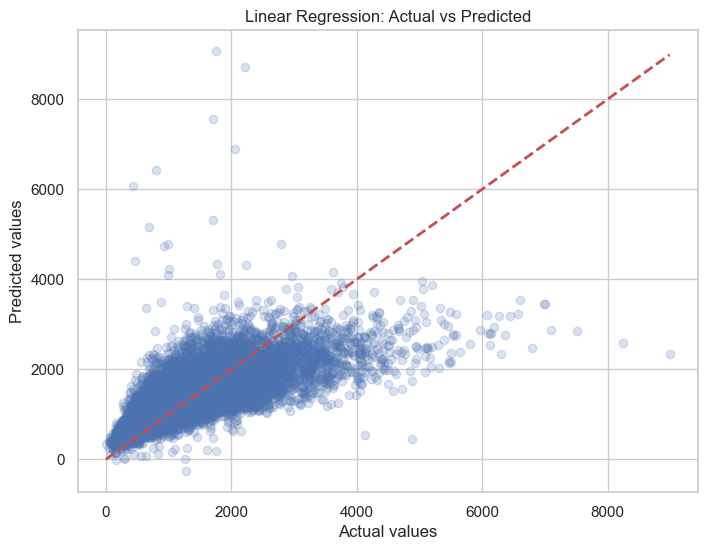

In [16]:
# Predictions
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # reference line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

### 4.2. Cross-Validation

While a single train-test split provides an initial estimate of performance, it can be sensitive to how the data was divided. We implement **K-Fold Cross-Validation** ($K=5$) to validate the model's reliability. In this process, the dataset is split into five equal "folds." The model is trained on four folds and tested on the fifth, repeating this process until every fold has served as the test set.

In [17]:
# --- Cross-Validation ---
cv_folds = 5

scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_folds, scoring='r2')

print(f"--- {cv_folds}-Fold Cross-Validation Results ---")
print(f"R2 Scores: {scores}")
print(f"Mean R2 Score: {scores.mean():.4f}")

--- 5-Fold Cross-Validation Results ---
R2 Scores: [0.44057575 0.49649907 0.47474375 0.46272506 0.47860028]
Mean R2 Score: 0.4706


The 5-fold cross-validation yielded a mean $R^2$ of **0.4706**, demonstrating that our model consistently explains approximately 47% of the variance in `Lifetime_Value` across different subsets of the data. The individual fold scores range from 0.44 to 0.50, indicating low variance and high model stability; this suggests that the identified behavioral drivers are not artifacts of a specific data split but are reliable signals within the dataset. While the predictive power is moderate, the consistency of these results validates that our linear approach is robust and generalized, providing a solid foundation for the subsequent feature engineering phase.

### 4.3. Feature Engineering

#### 4.3.1. Polynomial Features

To capture potential non-linear relationships and synergies between behavioral drivers, we implemented **Polynomial Features** using Scikit-Learn’s PolynomialFeatures with a **degree of 2**. This transformation automatically expands the feature set by generating squared terms (e.g., $Age^2$) and interaction terms (e.g., $Mobile\_App\_Usage \times Social\_Media\_Engagement$), increasing the input variables from the initial 19 numerical features to 209. We applied this transformation to the scaled training data to prevent the squared values from reaching extreme magnitudes that could destabilize the regression coefficients. While this approach aims to allow the model to learn more complex patterns, such as the compounding effect of multi-channel engagement, the resulting increase in model complexity often risks overfitting, where the model captures noise rather than the underlying signal.

In [18]:
# Initialize PolynomialFeatures
# degree=2 creates squares and interactions; interaction_only=False includes squares
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and Transform the SCALED training data
# We use the scaled data to ensure the squared values don't become astronomically large
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Get names of the new features for interpretation
poly_feature_names = poly.get_feature_names_out(X.columns)

# Train the New Engineered Model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

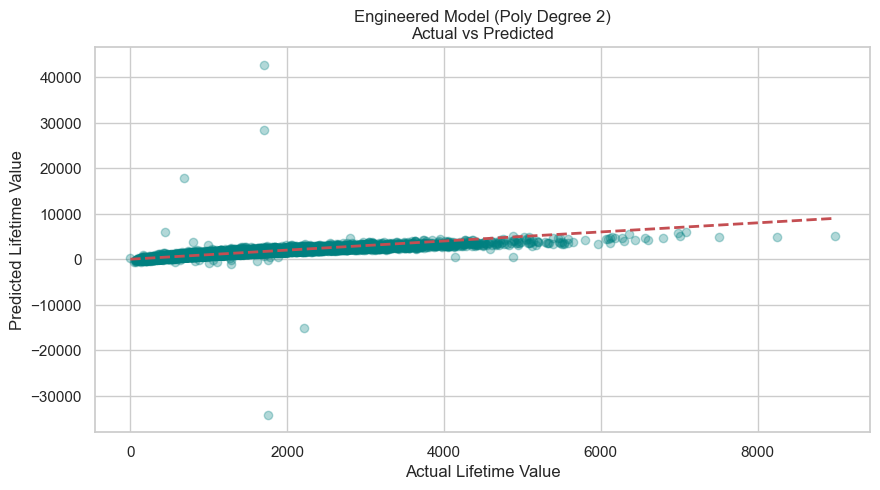

In [19]:
# --- Predictions ---
y_pred_poly = model_poly.predict(X_test_poly)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly, color='teal', alpha=0.3, label='Engineered Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Engineered Model (Poly Degree 2)\nActual vs Predicted")
plt.xlabel("Actual Lifetime Value")
plt.ylabel("Predicted Lifetime Value")
plt.show()

In [20]:
# --- Cross-validation for Polynomial Model ---
poly_cv_scores = cross_val_score(model_poly, X_train_poly, y_train, cv=cv_folds, scoring='r2')

print("--- Engineered (Polynomial) Model ---")
print(f"{cv_folds}-Fold Cross-Validation Results")
print(f"R2 scores (Not stable): {poly_cv_scores}")
print(f"Mean R2 Score: {poly_cv_scores.mean():.4f}")

--- Engineered (Polynomial) Model ---
5-Fold Cross-Validation Results
R2 scores (Not stable): [0.04772748 0.75831486 0.54570357 0.61048683 0.83793041]
Mean R2 Score: 0.5600


## 5. Results

The comparative performance results for both the baseline and polynomial models, as measured by $R^2$ and RMSE, are presented in the following table.

In [21]:
def evaluate_model(model, X_test, y_test, features):
    """
    Calculates performance metrics and extracts feature importance.
    """
    y_pred = model.predict(X_test)
    
    # Calculate Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Extract Coefficients
    importance = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    }).sort_values(by='Coefficient', ascending=False)
    
    return r2, rmse, importance

In [22]:
# Evaluate and extract insights
r2_base, rmse_base, driver_importance_base = evaluate_model(model, X_test_scaled, y_test, X.columns)
r2_poly, rmse_poly, driver_importance_poly = evaluate_model(model_poly, X_test_poly, y_test, poly_feature_names)

results = pd.DataFrame({
    'Model': ['Base', 'Polynomial'],
    'Complexity (Features)': [model.n_features_in_, model_poly.n_features_in_],
    'R2': [round(r2_base, 2), round(r2_poly, 2)],
    'RMSE': [round(rmse_base, 2), round(rmse_poly, 2)],
    'Reliability': ['High (Stable)', 'Low (Overfitted)'],
})

results

,Model,Complexity (Features),R2,RMSE,Reliability
0,Base,19,0.48,660.68,High (Stable)
1,Polynomial,209,0.34,745.52,Low (Overfitted)


The following horizontal bar chart illustrates the standardized coefficients of the linear regression model, identifying the relative impact and priority of each key value driver on Customer Lifetime Value.

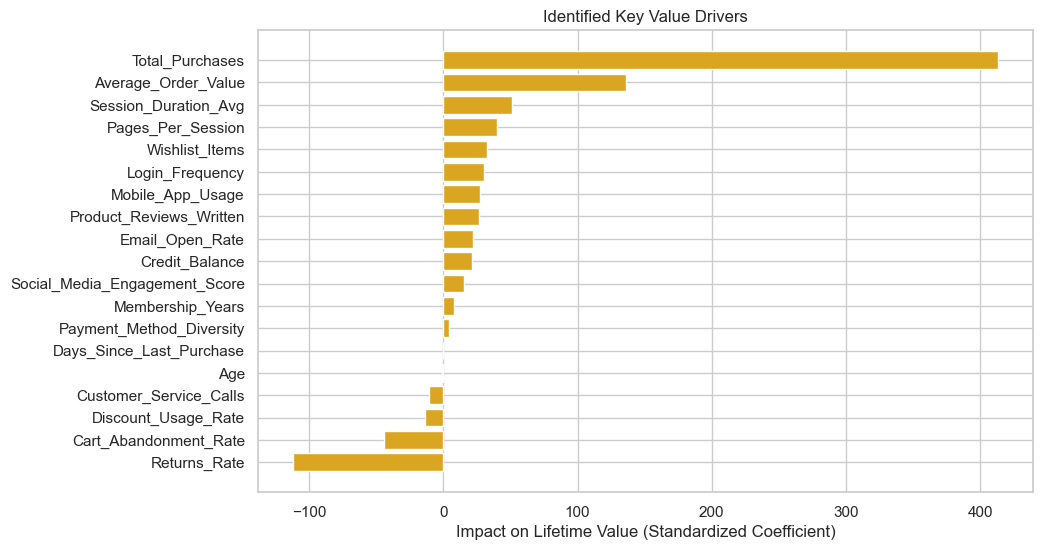

In [23]:
# Create a bar chart of the top coefficients
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Importance'], color='goldenrod')
plt.xlabel('Impact on Lifetime Value (Standardized Coefficient)')
plt.title('Identified Key Value Drivers')
plt.gca().invert_yaxis()
plt.show()

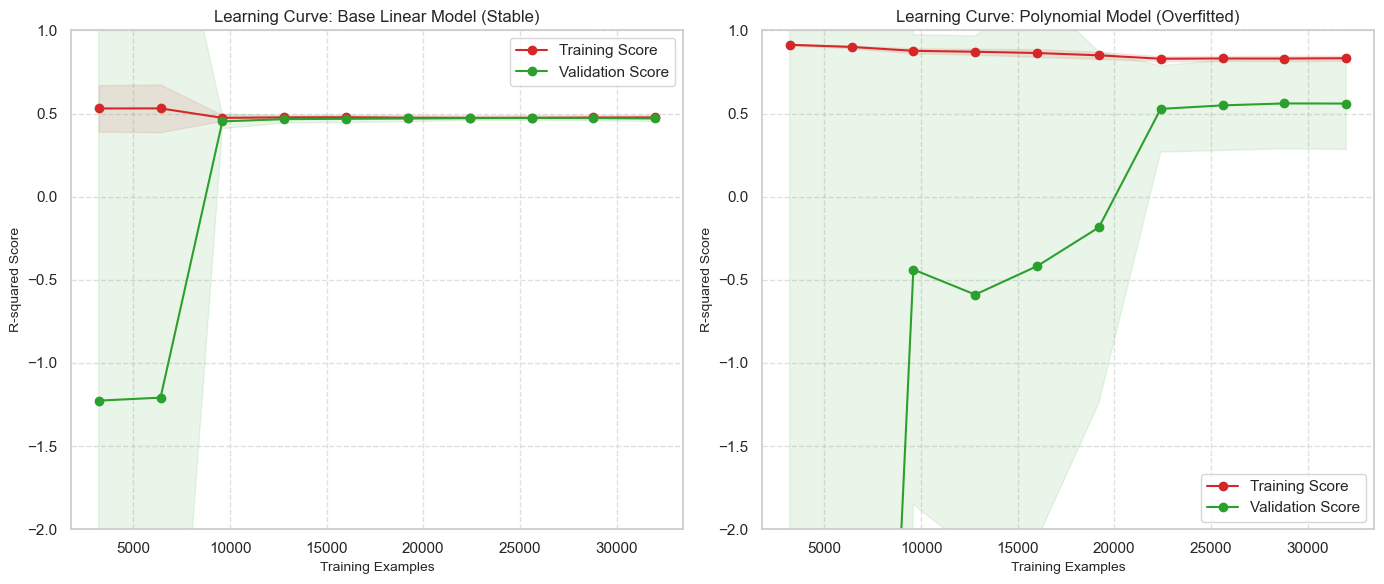

In [24]:
def plot_learning_curves(model, X, y, title):
    # Calculate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', 
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    # Calculate means and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot lines
    plt.plot(train_sizes, train_mean, 'o-', color="tab:red", label="Training Score")
    plt.plot(train_sizes, val_mean, 'o-', color="tab:green", label="Validation Score")
    
    # Add shadow for variance (Standard Deviation)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="tab:red")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="tab:green")
    
    plt.title(title, fontsize=12)
    plt.xlabel("Training Examples", fontsize=10)
    plt.ylabel("R-squared Score", fontsize=10)
    plt.legend(loc="best")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(-2, 1)

# Generate side-by-side plots
plt.figure(figsize=(14, 6))

# Subplot 1: Base Model
plt.subplot(1, 2, 1)
plot_learning_curves(model, X_train_scaled, y_train, "Learning Curve: Base Linear Model (Stable)")

# Subplot 2: Polynomial Model
plt.subplot(1, 2, 2)
plot_learning_curves(model_poly, X_train_poly, y_train, "Learning Curve: Polynomial Model (Overfitted)")

plt.tight_layout()
plt.show()

**Base Linear Model (Left)**: The training and cross-validation scores converge closely. This indicates that the model is stable and generalizes well to new data.

**Polynomial Model (Right)**: There is a significant "gap" between the high training score and the lower cross-validation score. This gap is the visual signature of **Overfitting**, the model has learned the "noise" in the training data rather than the underlying pattern.

## 6. Evaluation

The predictive modeling phase concluded with a rigorous comparison between a baseline Multiple Linear Regression model and an expanded Polynomial Regression model. While the objective was to identify complex behavioral synergies, the results provided a critical lesson in model selection and the risks of over-parameterization in marketing analytics.

### 6.1. Numerical Performance and Metric Justification

The **Base Linear Model** significantly outperformed the more complex iteration across all key metrics. While the Base Model achieved an $R^2$ of **0.48** using only 19 features, the **Polynomial Model** saw a performance drop to **0.34**, despite utilizing 209 features. This numerical divergence is a clear indicator of "the curse of dimensionality," where the excessive number of features caused the model to capture noise rather than meaningful patterns.

To evaluate these models, we prioritized **Root Mean Squared Error (RMSE)** alongside $R^2$:
- **Absolute Error Assessment**: The Base Model maintained an RMSE of 660.68, whereas the Polynomial Model’s error rose to 745.52.
- **Precision in Currency**: RMSE provides an absolute measure of error in the same units as the target variable (USD). By squaring the residuals before averaging, it heavily penalizes large "misses." In a business context, significantly miscalculating a "whale" customer's value carries a high strategic cost; RMSE ensures the model is optimized to minimize these costly outliers.

### 6.2. Reflective Evaluation: Key Value Drivers

While transactional anchors like `Total_Purchases` and `Average_Order_Value` naturally provide the strongest mathematical correlation to `Lifetime_Value`, the model's true value lies in identifying actionable marketing levers.

- **Primary Behavioral Driver**: Excluding transactional data, `Session_Duration_Avg` emerged as the most critical driver of customer value.

- **Engagement Hierarchy**: The model identified a clear hierarchy for marketing resource allocation: `Mobile_App_Usage` holds the highest impact, followed by `Email_Open_Rate`, and finally `Social_Media_Engagement_Score`.

- **Strategic Insights**: These results suggest that marketing efforts should prioritize deep app engagement and session "stickiness" over broader social media reach to maximize long-term revenue.

### 6.3. Contributions and Transferability

This project contributes to the e-commerce domain by providing a **quantifiable framework** for budget allocation. Instead of relying on qualitative assumptions, marketers can use these standardized coefficients to predict how a 1-unit increase in app engagement or session time translates to dollar-value growth.

The solution is highly **transferable** to other digital-first domains, such as **SaaS (Software as a Service)** [[6]](https://en.wikipedia.org/wiki/Software_as_a_service) or **Subscription Media**. In a SaaS context, "Total Purchases" would be replaced by "Subscription Tenure," while "Session Duration" and "App Usage" would remain critical indicators of churn resistance and expansion potential. The modular structure of the code ensures that this pipeline can be adapted to identify value drivers in any industry where user engagement is the primary engine of financial growth.

## 7. Conclusion

### 7.1. Summary of Findings

This research successfully identified and quantified the primary drivers of Customer Lifetime Value (CLV) within the e-commerce sector using a robust linear regression framework. The final "Champion Model" achieved an $R^2$ of **0.48** and an **RMSE** of **660.68**, demonstrating a strong balance between predictive accuracy and model stability. Beyond the expected transactional anchors of `Total_Purchases` and `Average_Order_Value`, the analysis revealed that `Session_Duration_Avg` and `Mobile_App_Usage` are the most influential behavioral predictors. The failure of the polynomial model, which saw a performance drop to **0.34** $R^2$, underscored that the relationships between engagement and value in this dataset are predominantly linear and that excessive complexity leads to significant overfitting.

### 7.2. Limitations

Despite the model's high reliability, several limitations persist. First, the $R^2$ of 0.48 suggests that over 50% of the variance in customer expenditure remains unexplained, likely due to external variables not captured in this dataset, such as seasonal trends, competitor pricing, or qualitative brand sentiment. Furthermore, the reliance on a snapshot of historical data means the model does not account for real-time shifts in consumer behavior or the impact of specific, short-term marketing campaigns. Finally, the presence of extreme "whale" outliers, while strategically retained to represent the full business reality, may still introduce a degree of bias that a simple linear model cannot fully mitigate.

### 7.3. Future Work

To enhance the predictive power of the current solution, future iterations should explore **Regularization techniques** [[7]](https://www.geeksforgeeks.org/machine-learning/regularization-in-machine-learning/) (such as Ridge or Lasso regression)  to "tame" the polynomial features that previously led to overfitting. Incorporating **Time-Series Analysis** would also allow for the detection of temporal patterns, such as decaying engagement over time. Additionally, integrating unstructured data, such as customer support logs or sentiment analysis from product reviews, could provide the "missing" behavioral context needed to explain the remaining variance in customer spend.

### 7.4. Practical Implications

The results of this study offer a data-driven roadmap for strategic marketing allocation. By identifying `Mobile_App_Usage` as high-impact drivers, the business can shift resources away from broad-reach social media campaigns and toward deep-engagement tactics that keep users within the mobile ecosystem.

This aligns directly with our objective to move beyond intuition-based marketing toward a **quantifiable ROI framework**. In the real-world domain, these insights allow for more granular customer segmentation; high-engagement/low-spend users can be targeted with conversion incentives, while low-engagement/high-spend users can be targeted with app-adoption campaigns to secure their long-term loyalty. Ultimately, this model provides a transferable logic for any digital-first organization seeking to optimize the lifecycle value of its customer base through evidence-based behavioral engineering.

## 8. References

[1] Wikipedia contributors, “Market analysis,” *Wikipedia*, Nov. 10, 2025. https://en.wikipedia.org/wiki/Market_analysis  
‌[2] T. Finn and A. Downie, “Customer lifetime value,” *IBM*, Nov. 17, 2025. https://www.ibm.com/think/topics/customer-lifetime-value  
[3] “Checking your browser - reCAPTCHA.” https://www.kaggle.com/datasets/dhairyajeetsingh/ecommerce-customer-behavior-dataset  
[4] “Database Contents License (DbCL) v1.0 — Open Data Commons: legal tools for open data.” https://opendatacommons.org/licenses/dbcl/1-0/  
[5] Wikipedia Contributors, “Ordinary least squares,” Wikipedia, Nov. 28, 2019. https://en.wikipedia.org/wiki/Ordinary_least_squares  
[6] Wikipedia Contributors, “Software as a service,” Wikipedia, Apr. 08, 2019. https://en.wikipedia.org/wiki/Software_as_a_service  
[7] GeeksforGeeks, “Regularization in Machine Learning,” GeeksforGeeks, May 23, 2019. https://www.geeksforgeeks.org/machine-learning/regularization-in-machine-learning/  